### EDA Analysis of Tag Relationship Matrix for stackexchange data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data is stored in posts dataframe
posts=pd.read_csv('G:\\Anitha\\stackexchange\\Post4_result.csv')

# Display basic information about the dataset
print(posts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42215 entries, 0 to 42214
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                42215 non-null  int64  
 1   PostTypeId        42215 non-null  int64  
 2   AcceptedAnswerId  10800 non-null  float64
 3   CreationDate      42215 non-null  object 
 4   Score             42215 non-null  int64  
 5   ViewCount         21139 non-null  float64
 6   Body              42007 non-null  object 
 7   OwnerUserId       41254 non-null  float64
 8   LastEditorUserId  20600 non-null  float64
 9   LastEditDate      20842 non-null  object 
 10  LastActivityDate  42215 non-null  object 
 11  Title             21139 non-null  object 
 12  Tags              21139 non-null  object 
 13  AnswerCount       21139 non-null  float64
 14  CommentCount      42215 non-null  int64  
 15  FavoriteCount     11830 non-null  float64
dtypes: float64(6), int64(4), object(6)
memor

In [2]:
# Descriptive statistics for numerical columns
print(posts.describe())

                 Id    PostTypeId  AcceptedAnswerId         Score  \
count  42215.000000  42215.000000      10800.000000  42215.000000   
mean   20242.777851      1.546962      18743.247037      8.478598   
std    11679.692650      0.649439      11716.248106     11.407103   
min        1.000000      1.000000          6.000000    -16.000000   
25%    10774.500000      1.000000       9116.000000      2.000000   
50%    19489.000000      1.000000      17686.000000      5.000000   
75%    30026.500000      2.000000      28926.000000     11.000000   
max    41262.000000      7.000000      41242.000000    252.000000   

          ViewCount   OwnerUserId  LastEditorUserId   AnswerCount  \
count  21139.000000  41254.000000      20600.000000  21139.000000   
mean    1182.694498   9699.244631       8424.209709      2.535976   
std     3107.471471   8812.813881       7217.226820      2.091906   
min        5.000000     -1.000000         -1.000000      0.000000   
25%      184.000000   1010.000000

In [3]:
# Check for missing values
print(posts.isnull().sum())
#print(posts[posts.isnull()])

Id                      0
PostTypeId              0
AcceptedAnswerId    31415
CreationDate            0
Score                   0
ViewCount           21076
Body                  208
OwnerUserId           961
LastEditorUserId    21615
LastEditDate        21373
LastActivityDate        0
Title               21076
Tags                21076
AnswerCount         21076
CommentCount            0
FavoriteCount       30385
dtype: int64


In [4]:
### Removing null values
df_cleaned_data=posts.dropna()
df_cleaned_data # Total 4831 rows

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,1,1,180.0,2012-02-14T20:23:40.127,12,198.0,<p>As from title. What kind of visa class do I...,5.0,2700.0,2013-10-30T09:14:11.633,2013-10-30T09:14:11.633,What kind of Visa is required to work in Acade...,job-search,1.0,1,1.0
1,1,1,180.0,2012-02-14T20:23:40.127,12,198.0,<p>As from title. What kind of visa class do I...,5.0,2700.0,2013-10-30T09:14:11.633,2013-10-30T09:14:11.633,What kind of Visa is required to work in Acade...,visa,1.0,1,1.0
2,1,1,180.0,2012-02-14T20:23:40.127,12,198.0,<p>As from title. What kind of visa class do I...,5.0,2700.0,2013-10-30T09:14:11.633,2013-10-30T09:14:11.633,What kind of Visa is required to work in Acade...,japan,1.0,1,1.0
7,3,1,6.0,2012-02-14T20:27:41.980,31,1659.0,<p>As from title. Not all journals provide the...,5.0,1580.0,2012-10-04T15:22:37.497,2013-09-10T19:58:02.267,Where can I find the Impact Factor for a given...,journals,4.0,0,8.0
8,3,1,6.0,2012-02-14T20:27:41.980,31,1659.0,<p>As from title. Not all journals provide the...,5.0,1580.0,2012-10-04T15:22:37.497,2013-09-10T19:58:02.267,Where can I find the Impact Factor for a given...,bibliometrics,4.0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41905,41023,1,41026.0,2015-03-04T20:05:29.210,7,728.0,"<p>I'm a Msc student, and my project is to dev...",31189.0,15723.0,2015-03-04T21:02:33.613,2015-03-04T21:02:33.613,Is development research?,engineering,3.0,3,1.0
41998,41090,1,41153.0,2015-03-05T17:46:35.610,6,72.0,<p>I am helping an academic client from Russia...,31325.0,11365.0,2015-03-06T04:49:18.503,2015-03-06T12:25:18.453,Google Scholar - how to make English profile n...,language,1.0,2,1.0
41999,41090,1,41153.0,2015-03-05T17:46:35.610,6,72.0,<p>I am helping an academic client from Russia...,31325.0,11365.0,2015-03-06T04:49:18.503,2015-03-06T12:25:18.453,Google Scholar - how to make English profile n...,personal-name,1.0,2,1.0
42000,41090,1,41153.0,2015-03-05T17:46:35.610,6,72.0,<p>I am helping an academic client from Russia...,31325.0,11365.0,2015-03-06T04:49:18.503,2015-03-06T12:25:18.453,Google Scholar - how to make English profile n...,google-scholar,1.0,2,1.0


In [5]:
### checking null count in df_cleaned_data
df_cleaned_data.isna().sum() #confirmed that no null values in df_cleaned_data

Id                  0
PostTypeId          0
AcceptedAnswerId    0
CreationDate        0
Score               0
ViewCount           0
Body                0
OwnerUserId         0
LastEditorUserId    0
LastEditDate        0
LastActivityDate    0
Title               0
Tags                0
AnswerCount         0
CommentCount        0
FavoriteCount       0
dtype: int64

Id                  0
PostTypeId          0
AcceptedAnswerId    0
CreationDate        0
Score               0
ViewCount           0
Body                0
OwnerUserId         0
LastEditorUserId    0
LastEditDate        0
LastActivityDate    0
Title               0
Tags                0
AnswerCount         0
CommentCount        0
FavoriteCount       0
dtype: int64


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

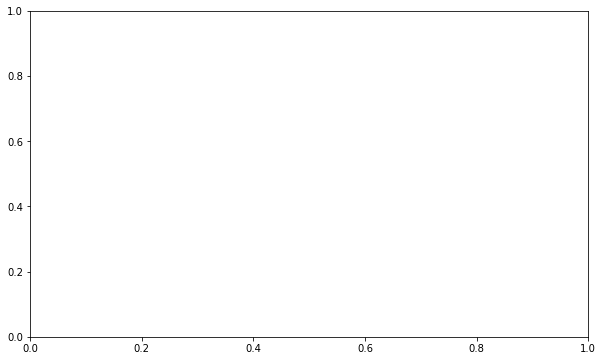

In [6]:
# Distribution of scores histoplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df_cleaned_data'
# If not, you can read it from a CSV or another format using pd.read_csv() or other appropriate methods.

# Display basic information about the dataset
#print(df_cleaned_data.info())

# Descriptive statistics for numerical columns
#print(df_cleaned_data.describe())

# Check for missing values
print(df_cleaned_data.isnull().sum())

# Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(posts['OwnerUserId'], bins=20, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

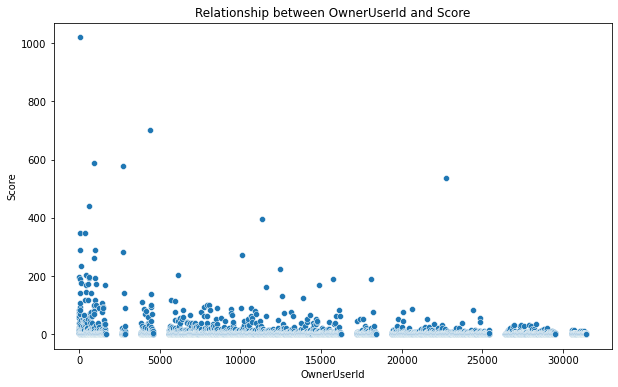

In [7]:
# Relationship between ViewCount and Score
#A scatterplot shows the relationship between two quantitative variables measured for the same individuals. 
#The values of one variable appear on the horizontal axis, and the values of the other variable appear on the vertical axis. 
#Each individual in the data appears as a point on the graph.

plt.figure(figsize=(10, 6))
df_grouped_data=posts.groupby('OwnerUserId').count()
#df_grouped_data
sns.scatterplot(x='OwnerUserId', y='Score', data=df_grouped_data)
#sns.scatterplot(x='ViewCount', y='Score', data=df_grouped_data) #viewcount Vs Score
plt.title('Relationship between OwnerUserId and Score')
plt.xlabel('OwnerUserId')
plt.ylabel('Score')
plt.show()

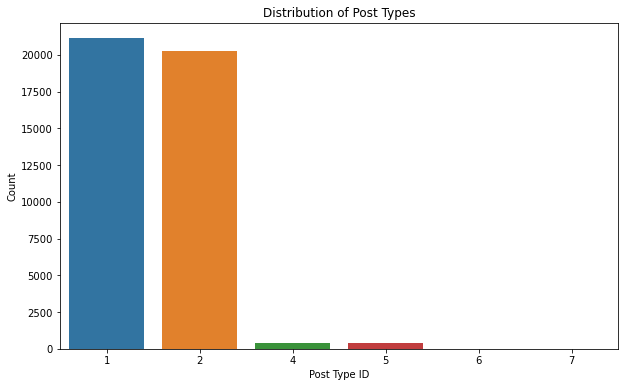

In [8]:
# Bar plot for Post types
plt.figure(figsize=(10, 6))
sns.countplot(x='PostTypeId', data=posts)
plt.title('Distribution of Post Types')
plt.xlabel('Post Type ID')
plt.ylabel('Count')
plt.show()


In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(posts.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '2012-02-14T20:23:40.127'

<Figure size 864x576 with 0 Axes>

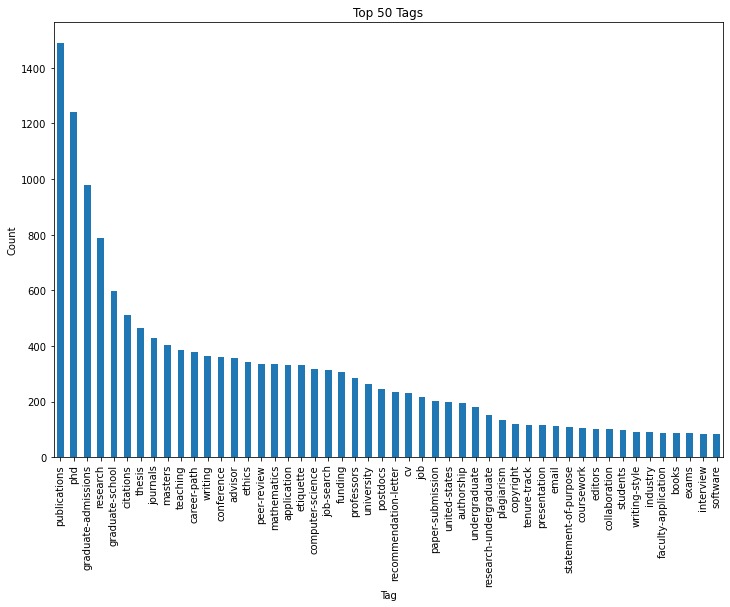

In [11]:
# Top tags
top_tags = posts['Tags'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
top_tags[:50].plot(kind='bar')
plt.title('Top 50 Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

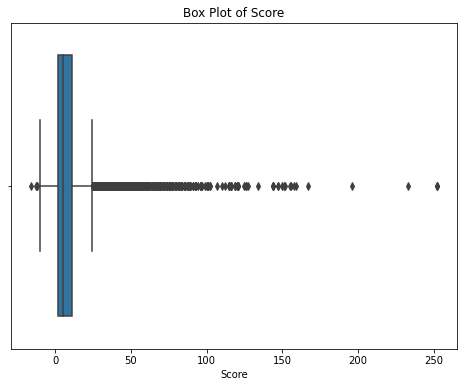

In [12]:
#outliers for score
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Score
plt.figure(figsize=(8, 6))
sns.boxplot(x=posts['Score'])
plt.title('Box Plot of Score')
plt.show()

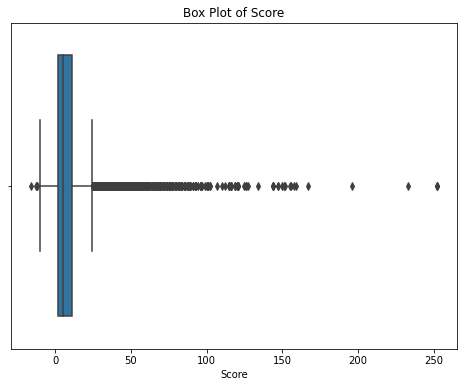

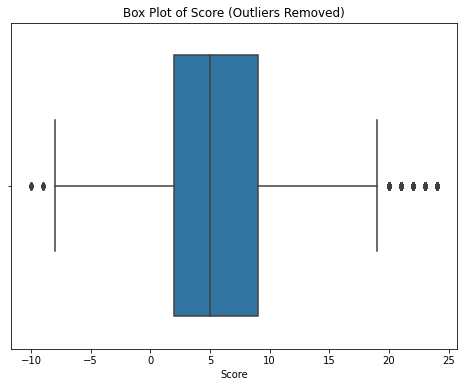

DataFrame without outliers:
          Id  PostTypeId  AcceptedAnswerId             CreationDate  Score  \
0          1           1             180.0  2012-02-14T20:23:40.127     12   
1          1           1             180.0  2012-02-14T20:23:40.127     12   
2          1           1             180.0  2012-02-14T20:23:40.127     12   
3          2           1             246.0  2012-02-14T20:26:22.683      7   
4          2           1             246.0  2012-02-14T20:26:22.683      7   
...      ...         ...               ...                      ...    ...   
42210  41258           1               NaN  2015-03-08T01:05:20.297      0   
42211  41259           2               NaN  2015-03-08T01:14:34.710      2   
42212  41260           2               NaN  2015-03-08T01:26:40.117      1   
42213  41261           2               NaN  2015-03-08T01:57:13.583      1   
42214  41262           2               NaN  2015-03-08T02:57:28.520      0   

       ViewCount                   

In [13]:
#Outlier calculation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('G:\Anitha\stackexchange\Post4_result.csv')
# Box plot for Score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Score'])
plt.title('Box Plot of Score')
plt.show()

# Calculate the IQR (Interquartile Range)
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Score'] >= lower_bound) & (df['Score'] <= upper_bound)]

# Box plot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Score'])
plt.title('Box Plot of Score (Outliers Removed)')
plt.show()

# Display the cleaned DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers)

In [14]:
df.info()
df_numeric=df
df_numeric.info()
import pandas as pd

# Assuming df is your DataFrame
df_numeric['CreationDate'] = pd.to_datetime(df_numeric['CreationDate'])
df_numeric['LastEditDate'] = pd.to_datetime(df_numeric['LastEditDate'])
df_numeric['LastActivityDate'] = pd.to_datetime(df_numeric['LastActivityDate'])

# Extract numeric features
df_numeric['CreationYear'] = df_numeric['CreationDate'].dt.year
df_numeric['CreationMonth'] = df_numeric['CreationDate'].dt.month
df_numeric['CreationDay'] = df_numeric['CreationDate'].dt.day

df_numeric['LastEditYear'] = df_numeric['LastEditDate'].dt.year
df_numeric['LastEditMonth'] = df_numeric['LastEditDate'].dt.month
df_numeric['LastEditDay'] = df_numeric['LastEditDate'].dt.day

df_numeric['LastActivityYear'] = df_numeric['LastActivityDate'].dt.year
df_numeric['LastActivityMonth'] = df_numeric['LastActivityDate'].dt.month
df_numeric['LastActivityDay'] = df_numeric['LastActivityDate'].dt.day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42215 entries, 0 to 42214
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                42215 non-null  int64  
 1   PostTypeId        42215 non-null  int64  
 2   AcceptedAnswerId  10800 non-null  float64
 3   CreationDate      42215 non-null  object 
 4   Score             42215 non-null  int64  
 5   ViewCount         21139 non-null  float64
 6   Body              42007 non-null  object 
 7   OwnerUserId       41254 non-null  float64
 8   LastEditorUserId  20600 non-null  float64
 9   LastEditDate      20842 non-null  object 
 10  LastActivityDate  42215 non-null  object 
 11  Title             21139 non-null  object 
 12  Tags              21139 non-null  object 
 13  AnswerCount       21139 non-null  float64
 14  CommentCount      42215 non-null  int64  
 15  FavoriteCount     11830 non-null  float64
dtypes: float64(6), int64(4), object(6)
memor

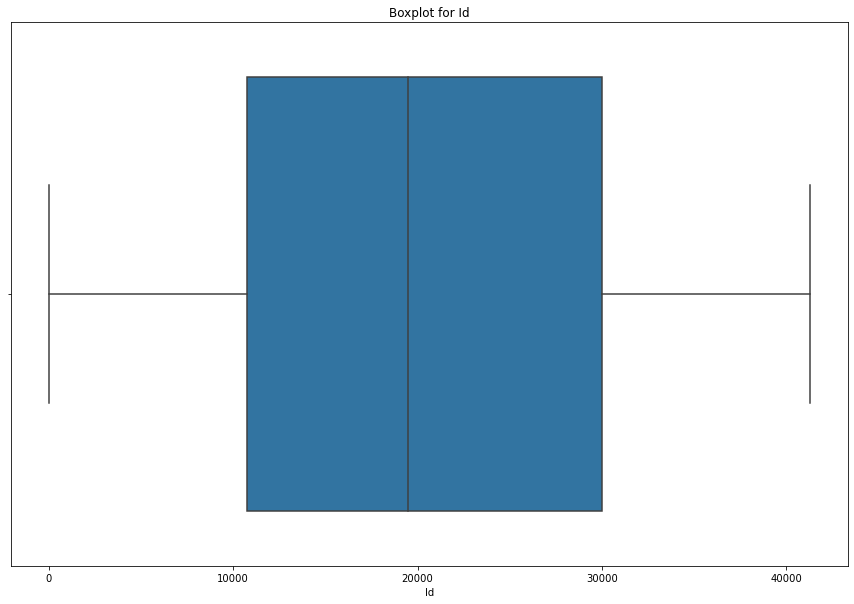

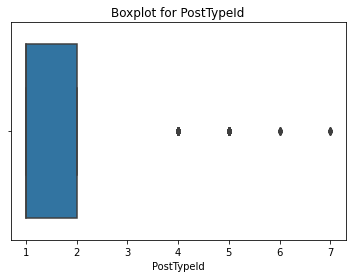

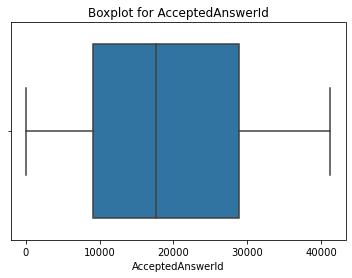

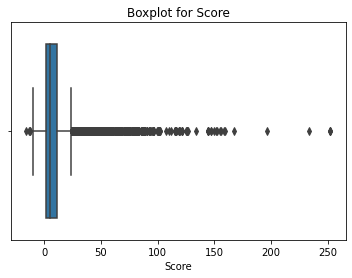

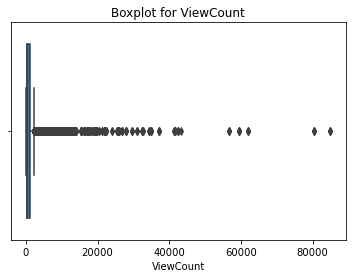

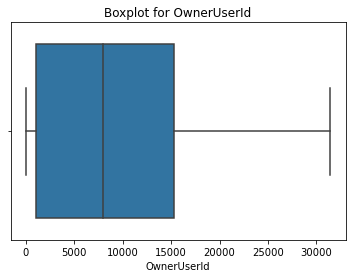

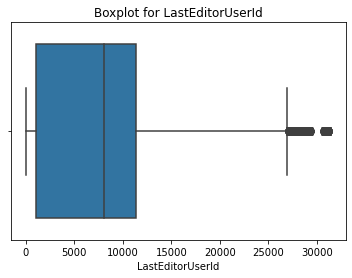

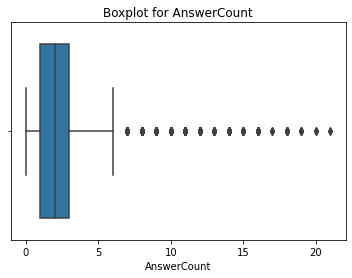

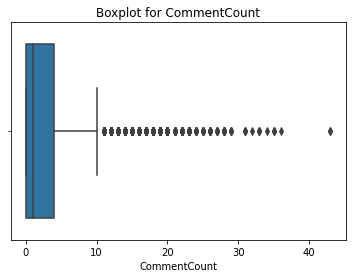

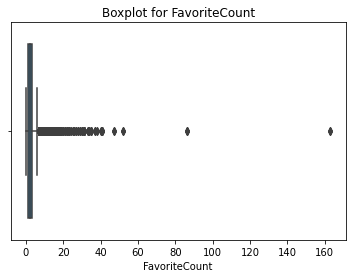

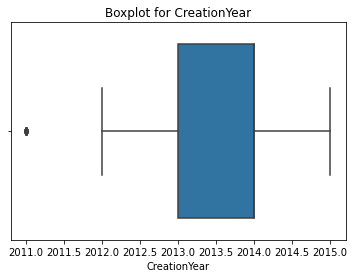

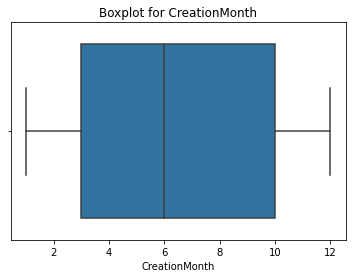

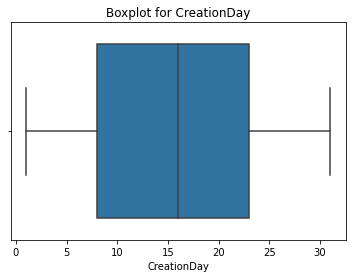

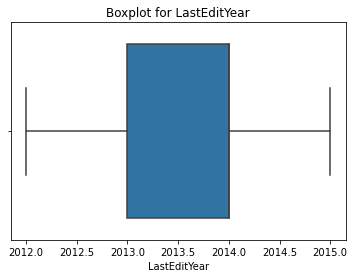

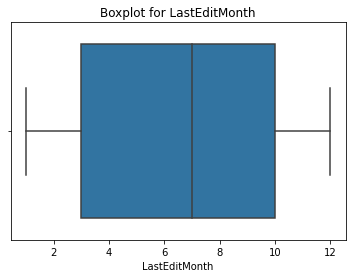

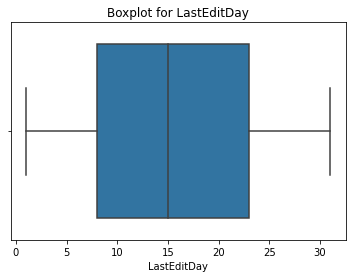

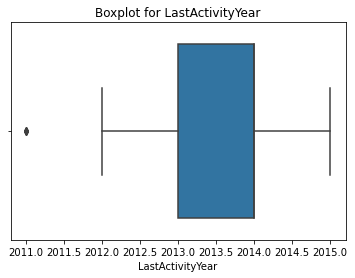

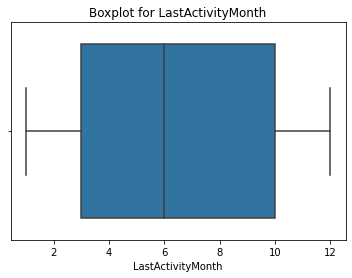

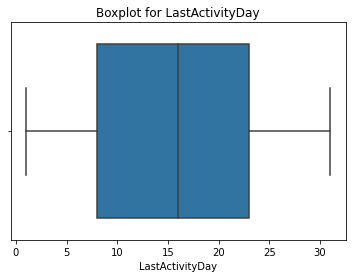

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_numeric.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Create boxplots for each numeric column
plt.figure(figsize=(15, 10))
for column in numeric_columns:
    sns.boxplot(x=df_numeric[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [16]:
for column in numeric_columns:
    q1 = df_numeric[column].quantile(0.25)
    q3 = df_numeric[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_numeric[(df_numeric[column] < lower_bound) | (df_numeric[column] > upper_bound)]
    
    print(f'Outliers in {column}: {len(outliers)}')

Outliers in Id: 0
Outliers in PostTypeId: 797
Outliers in AcceptedAnswerId: 0
Outliers in Score: 2781
Outliers in ViewCount: 2485
Outliers in OwnerUserId: 0
Outliers in LastEditorUserId: 398
Outliers in AnswerCount: 990
Outliers in CommentCount: 1614
Outliers in FavoriteCount: 1045
Outliers in CreationYear: 16
Outliers in CreationMonth: 0
Outliers in CreationDay: 0
Outliers in LastEditYear: 0
Outliers in LastEditMonth: 0
Outliers in LastEditDay: 0
Outliers in LastActivityYear: 5
Outliers in LastActivityMonth: 0
Outliers in LastActivityDay: 0
